In [2]:
import pandas as pd
import requests
import os
import gzip
import subprocess

wd = "Radiosensitivity Prediction/data"

In [2]:
ccle_file_names = ['CCLE_RRBS_cgi_CpG_clusters_20181119.txt.gz', 'CCLE_RRBS_enh_CpG_clusters_20181119.txt.gz', 'CCLE_RRBS_tss_CpG_clusters_20181022.txt.gz']

# Inspect the data

In [ ]:
# classical way to read-in the CCLE promotor metylation data
df = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()
df["locus_id"] = df["locus_id"].apply(lambda x : x.split("_")[0])
df = df.drop(df.columns[1:3], axis=1)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(0.0)
df = df.groupby("locus_id").mean().T
df.index = [x.split("_")[0] for x in df.index]
df = df.loc[~df.index.duplicated(keep="first")]
df.to_csv(f"{wd}/Cleveland/CCLE_Methylation_TSS1kb_20181022.csv", index=True)

In [ ]:
#  CCLE promotor data
ccle_prom = pd.read_csv(f"../data/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t")
ccle_prom.head(5)

In [ ]:
ccle_enh = pd.read_csv(f"../data/Cleveland/{ccle_file_names[1]}", sep="\t")
ccle_enh.head(5)

In [ ]:
ccle_tss = pd.read_csv(f"../data/Cleveland/{ccle_file_names[2]}", sep="\t")
ccle_tss.head(5)

In [ ]:
ccle_cgi = pd.read_csv(f"../data/Cleveland/{ccle_file_names[0]}", sep="\t")
ccle_cgi.head(5)

# Preprocess and combine

In [3]:
def process_and_save(path, id_col, dataset_name, output_path):
    df = pd.read_csv(f"../data/Cleveland/{path}", sep="\t", compression="infer").dropna()
    df = df.rename(columns={id_col: "region_id"})
    df["dataset"] = dataset_name
    df["CpG_list"] = df["CpG_sites_hg19"].astype(str)
    df = df.drop_duplicates(subset="CpG_list")
    df.drop(columns=["CpG_list"], inplace=True)
    df.to_csv(output_path, index=False)

In [4]:
process_and_save("CCLE_RRBS_TSS1kb_20181022.txt", "locus_id", "TSS1kb", "tss1kb_clean.csv")
process_and_save(ccle_file_names[2], "cluster_id", "TSS_Cluster", "tss_clusters_clean.csv")
process_and_save(ccle_file_names[0], "cluster_id", "CGI", "cgi_clusters_clean.csv")
process_and_save(ccle_file_names[1], "cluster_id", "Enhancer", "enh_clusters_clean.csv")

C:\Users\mmarc\AppData\Local\Temp\ipykernel_32652\1277826582.py:2: DtypeWarning: Columns (2,618) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../data/Cleveland/{path}", sep="\t", compression="infer").dropna()
C:\Users\mmarc\AppData\Local\Temp\ipykernel_32652\1277826582.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../data/Cleveland/{path}", sep="\t", compression="infer").dropna()
C:\Users\mmarc\AppData\Local\Temp\ipykernel_32652\1277826582.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../data/Cleveland/{path}", sep="\t", compression="infer").dropna()


In [5]:
dfs = [pd.read_csv(f) for f in [
    "tss1kb_clean.csv", 
    "tss_clusters_clean.csv", 
    "cgi_clusters_clean.csv", 
    # "enh_clusters_clean.csv"
]]
combined = pd.concat(dfs, ignore_index=True)
# combined.to_csv("CCLE_methylation_combined.csv", index=False)


C:\Users\mmarc\AppData\Local\Temp\ipykernel_32652\2832452628.py:1: DtypeWarning: Columns (618) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in [
C:\Users\mmarc\AppData\Local\Temp\ipykernel_32652\2832452628.py:1: DtypeWarning: Columns (9,10,15,17,52,58,59,61,65,68,75,77,85,91,92,104,114,126,130,135,142,146,159,196,207,228,278,279,304,308,311,313,327,350,380,387,414,417,419,434,453,454,484,490,505,506,511,540,590,596,602,611,615,618,624,634,638,680,692,711,715,722,760,769,792,804) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in [


In [6]:
combined

,region_id,CpG_sites_hg19,avg_coverage,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,OE21_OESOPHAGUS,MOLT3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HOP62_LUNG,EKVX_LUNG,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG,dataset
0,SGIP1_1_66998638_66999638,1:66998970;1:66998973;1:66998993;1:66999404;1:...,25.00,0.00000,0.00000,0.75000,0.00000,0.95239,NaN,1.00000,...,NA,NA,NA,NA,NA,0.03448,0.77660,0.06665,0.66667,TSS1kb
1,SGIP1_1_66998251_66999251,1:66998970;1:66998973;1:66998993,8.27,0.00000,NaN,NaN,0.00000,0.94443,NaN,NaN,...,NA,NA,NA,NA,NA,0.00000,NaN,NaN,0.66667,TSS1kb
2,AZIN2_1_33545713_33546713,1:33546151;1:33546209;1:33546210;1:33546385;1:...,326.58,0.00729,0.03232,0.33160,0.22042,0.01291,0.03444,0.14411,...,NA,NA,NA,NA,NA,0.04821,0.06721,0.11539,0.00046,TSS1kb
3,AZIN2_1_33546778_33547778,1:33546783;1:33546788;1:33546795;1:33546797;1:...,480.54,0.22276,0.07784,0.26034,0.32106,0.27485,0.15940,0.34742,...,NA,NA,NA,NA,NA,0.15045,0.34739,0.30208,0.05159,TSS1kb
4,AGBL4_1_50489626_50490626,1:50489632;1:50489641;1:50489671;1:50489677;1:...,263.36,0.00000,0.01216,0.98113,0.56622,0.33960,0.43177,0.93363,...,NA,NA,NA,NA,NA,0.01874,0.19714,0.05052,0.54553,TSS1kb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158514,22_51156386_51159223,22:51158202;22:51158418;22:51158435;22:5115843...,342.56,0.97250,0.96709,0.95386,0.98048,0.98097,0.49744,0.96914,...,0.95614,0.93719,0.41357,0.64924,0.90853,1.00000,0.99424,0.95600,0.96917,CGI
158515,22_51156386_51159223,22:51158340;22:51158347,36.52,1.00000,1.00000,0.06250,0.80555,1.00000,1.00000,0.84315,...,0.96300,NaN,0.98440,0.62760,1.00000,0.06670,0.10000,0.97220,0.56250,CGI
158516,22_51156386_51159223,22:51158529;22:51158594;22:51158595;22:5115869...,289.34,0.97634,0.90329,0.92771,0.96567,0.96366,0.16067,0.89528,...,0.90809,0.88660,0.04933,0.26193,1.00000,1.00000,0.96159,0.99623,0.96967,CGI
158517,22_51159223_51162060,22:51159313;22:51159316;22:51159328;22:5115933...,208.76,0.97684,0.95130,0.98153,0.90924,0.99387,0.36507,0.97114,...,0.84955,0.87081,0.18902,0.50601,0.99115,0.67488,0.98889,0.95853,0.98196,CGI


Extract the gene name from datasets that do provide it

In [7]:
df = combined
# Named if region_id starts with gene name (text + underscore + chromosome)
# named_mask = df['region_id'].astype(str).str.contains(r'^[A-Za-z]+[A-Za-z0-9]*_[\dXYM]+_')
named_mask = df['dataset'].isin(['TSS1kb', 'TSS_Cluster'])


df_named = df[named_mask].copy()
df_unnamed = df[~named_mask].copy()

# For named ones, extract the gene directly
df_named['Gene'] = df_named['region_id'].str.extract(r'^([A-Za-z0-9\-\.]+)_')

# Extract coordinates from region_id
df_unnamed[['chr', 'start', 'end']] = df_unnamed['region_id'].str.extract(
    r'(?P<chr>\d+|X|Y|MT)_(?P<start>\d+)_(?P<end>\d+)'
)

# Drop any rows where extraction failed (e.g., region_id is malformed)
df_unnamed = df_unnamed.dropna(subset=["chr", "start", "end"])

# Convert types
df_unnamed['chr'] = 'chr' + df_unnamed['chr']
df_unnamed['start'] = df_unnamed['start'].astype(int)
df_unnamed['end'] = df_unnamed['end'].astype(int)

In [8]:
df_named['Gene'].nunique()

20587

### Map unnamed regions to genes 

first download refGene.txt.gz from hg19: http://hgdownload.cse.ucsc.edu/goldenPath/hg19/database/refGene.txt.gz

then make it into .bed file

In [9]:
import pandas as pd

# Load refGene.txt.gz (no header, tab-separated)
cols = [
    "bin", "name", "chrom", "strand", "txStart", "txEnd",
    "cdsStart", "cdsEnd", "exonCount", "exonStarts", "exonEnds",
    "score", "gene", "cdsStartStat", "cdsEndStat", "exonFrames"
]
refgene = pd.read_csv("refGene.txt.gz", sep="\t", names=cols)

# For gene bodies
gene_bodies = refgene.groupby(["gene", "chrom"]).agg({
    "txStart": "min",
    "txEnd": "max"
}).reset_index()

# Make BED format: chrom, start, end, gene
gene_bodies_bed = gene_bodies[["chrom", "txStart", "txEnd", "gene"]]
gene_bodies_bed.columns = ["Chromosome", "Start", "End", "Gene"]
gene_bodies_bed.to_csv("gene_bodies_hg19.bed", sep="\t", index=False, header=False)


In [15]:
# import pandas as pd
# import pyranges as pr

# # 1. Load gene annotation BED file
# gene_annot = pd.read_csv(
#     "gene_bodies_hg19.bed",  # or your actual file path
#     sep="\t",
#     header=None,
#     names=["Chromosome", "Start", "End", "Gene"]
# )

# # 2. Prepare df_unnamed with genomic coordinates
# df_unnamed_coords = df_unnamed[["chr", "start", "end"]].rename(columns={
#     "chr": "Chromosome", "start": "Start", "end": "End"
# })
# df_unnamed_coords["idx"] = df_unnamed.index  # preserve row index

# # 3. Create PyRanges objects
# regions_pr = pr.PyRanges(df_unnamed_coords)
# genes_pr = pr.PyRanges(gene_annot)

# # 4. Find overlapping regions
# overlap = regions_pr.join(genes_pr)

# # 5. Map gene names back to original df_unnamed
# df_unnamed.loc[overlap.idx.values, "Gene"] = overlap.Gene.values

# # 6. Drop rows that didn’t map to any gene
# df_unnamed = df_unnamed.dropna(subset=["Gene"])


import pandas as pd
import pyranges as pr

# 1. Load gene annotation BED file
gene_annot = pd.read_csv(
    "gene_bodies_hg19.bed",
    sep="\t",
    header=None,
    names=["Chromosome", "Start", "End", "Gene"]
)

# 2. Prepare df_unnamed with genomic coordinates
df_unnamed_coords = df_unnamed[["chr", "start", "end"]].rename(columns={
    "chr": "Chromosome", "start": "Start", "end": "End"
})
df_unnamed_coords["idx"] = df_unnamed.index  # preserve row index

# 3. Create PyRanges objects
regions_pr = pr.PyRanges(df_unnamed_coords)
genes_pr = pr.PyRanges(gene_annot)

# 4. Find overlapping regions
overlap = regions_pr.join(genes_pr)

# 5. Merge back to original data: one row per region-gene pair
# Convert to dataframe
overlap_df = overlap.df

# Merge with original data on 'idx'
df_expanded = overlap_df.merge(df_unnamed, left_on="idx", right_index=True)

# Optional: clean up columns (e.g., drop duplicate coordinate columns if needed)
df_expanded = df_expanded.drop(columns=["Chromosome", "Start", "End"])  # from overlap, if redundant

# Now df_expanded has one row per (region, gene) pair



In [16]:
# Count how many times each region (idx) appears — i.e., how many genes it maps to
region_gene_counts = df_expanded['idx'].value_counts()
df_expanded['gene_count'] = df_expanded['idx'].map(region_gene_counts)

# Adjust avg_coverage
df_expanded['adjusted_coverage'] = df_expanded['avg_coverage'] / df_expanded['gene_count']

In [17]:
df_expanded

,idx,Start_b,End_b,Gene,region_id,CpG_sites_hg19,avg_coverage,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG,dataset,chr,start,end,gene_count,adjusted_coverage
0,77482,134772,140566,LOC729737,1_133124_137563,1:134999,21.37,0.71150,0.50520,NaN,...,0.06450,0.88460,0.55320,1.00000,CGI,chr1,133124,137563,1,21.37
1,77483,134772,140566,LOC729737,1_133124_137563,1:135191;1:135218,33.07,0.53845,0.85485,NaN,...,0.50000,1.00000,1.00000,0.89285,CGI,chr1,133124,137563,1,33.07
2,77484,134772,140566,LOC729737,1_133124_137563,1:135203;1:135208,33.22,0.90000,0.68550,NaN,...,0.92105,1.00000,1.00000,1.00000,CGI,chr1,133124,137563,1,33.22
3,77485,661138,714014,LOC100288069,1_711984_716547,1:713376;1:713388;1:713400;1:713448;1:713450;1...,96.96,0.85480,1.00000,0.93403,...,0.78261,0.66667,1.00000,0.96795,CGI,chr1,711984,716547,1,96.96
4,77486,661138,714014,LOC100288069,1_711984_716547,1:713901;1:713921;1:714178;1:714182;1:714199;1...,113.18,0.00000,0.00000,0.13514,...,0.00000,0.00000,0.00000,0.00000,CGI,chr1,711984,716547,1,113.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125399,158514,51111250,51171640,SHANK3,22_51156386_51159223,22:51158202;22:51158418;22:51158435;22:5115843...,342.56,0.97250,0.96709,0.95386,...,1.00000,0.99424,0.95600,0.96917,CGI,chr22,51156386,51159223,1,342.56
125400,158515,51111250,51171640,SHANK3,22_51156386_51159223,22:51158340;22:51158347,36.52,1.00000,1.00000,0.06250,...,0.06670,0.10000,0.97220,0.56250,CGI,chr22,51156386,51159223,1,36.52
125401,158516,51111250,51171640,SHANK3,22_51156386_51159223,22:51158529;22:51158594;22:51158595;22:5115869...,289.34,0.97634,0.90329,0.92771,...,1.00000,0.96159,0.99623,0.96967,CGI,chr22,51156386,51159223,1,289.34
125402,158517,51111250,51171640,SHANK3,22_51159223_51162060,22:51159313;22:51159316;22:51159328;22:5115933...,208.76,0.97684,0.95130,0.98153,...,0.67488,0.98889,0.95853,0.98196,CGI,chr22,51159223,51162060,1,208.76


combine both parts back

In [20]:
df_named["adjusted_coverage"] = df_named["avg_coverage"]
df_mapped = pd.concat([df_named, df_expanded], ignore_index=True)

aggregate by gene

In [22]:
import numpy as np

# Step 1: Define metadata and value columns
meta_cols = ["region_id", "CpG_sites_hg19", "avg_coverage", "dataset", "chr", "start", "end", "idx", "Start_b", "End_b"]
value_cols = df_mapped.columns.difference(meta_cols + ["Gene"])
df_mapped[value_cols] = df_mapped[value_cols].apply(pd.to_numeric, errors='coerce')
numeric_cols = df_mapped[value_cols].select_dtypes(include="number").columns

""" option 1: take the mean"""
# df_gene_agg = df_mapped.groupby("Gene")[numeric_cols].mean()

""" option 2: take weighted mean"""
# Weighted numerator: methylation * adjusted_coverage
weighted = df_mapped[numeric_cols].multiply(df_mapped["adjusted_coverage"], axis=0)

# Group and calculate weighted mean
numerator = weighted.groupby(df_mapped["Gene"]).sum()
denominator = df_mapped.groupby("Gene")["adjusted_coverage"].sum()
df_gene_weighted = numerator.div(denominator, axis=0)


In [24]:
df_gene_agg.to_csv("aggreagated_ccle_meth.csv", index=True)

In [23]:
df_gene_weighted

,22RV1_PROSTATE,2313287_STOMACH,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,...,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST,adjusted_coverage,gene_count
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.564062,0.334742,0.886478,0.551827,0.700807,0.561777,0.569943,0.537876,0.684461,0.694158,...,0.812627,0.679364,0.706275,0.772204,0.494213,0.489359,0.543333,0.559461,312.144711,0.702854
A1BG-AS1,0.877559,0.356256,0.709039,0.964324,0.670986,0.934604,0.721763,0.844344,0.756519,0.703966,...,0.788351,0.782395,0.757834,0.958082,0.874763,0.728458,0.941861,0.908401,239.639339,0.829307
A2M-AS1,0.061636,0.028683,0.817204,0.647003,0.039709,0.215466,0.059052,0.864626,0.145790,0.252713,...,0.052299,0.059824,0.042451,0.045602,0.066472,0.188182,0.048367,0.059634,453.407740,0.421584
A2ML1,0.832257,0.202682,0.661019,0.377065,0.854637,0.700141,0.706797,0.896640,0.583176,0.628836,...,0.670044,0.828833,0.773019,0.802786,0.659727,0.469348,0.773402,0.828366,125.429920,0.000000
A3GALT2,0.852479,0.521263,0.440430,0.924744,0.696736,0.839650,0.668307,0.622481,0.714732,0.676486,...,0.813355,0.773974,0.732060,0.886347,0.779485,0.758099,0.782184,0.815961,29.468786,2.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.271743,0.515142,0.031128,0.864493,0.608019,0.487654,0.163950,0.825975,0.018624,0.779319,...,0.844249,0.263140,0.817091,0.558725,0.621633,0.479478,0.035778,0.012648,298.385409,0.816494
ZYG11B,0.037030,0.000000,0.000000,0.006887,0.000000,0.135365,0.000000,0.000000,0.000000,0.000310,...,0.000000,0.000000,0.001297,0.000000,0.000000,0.002876,0.000000,0.001108,95.411412,1.132435
ZYX,0.105160,0.064839,0.038132,0.030807,0.042717,0.038253,0.069412,0.088209,0.035286,0.046833,...,0.051618,0.051429,0.042474,0.042490,0.028972,0.038956,0.061215,0.067209,783.039969,0.592862


# Maybe only named are enough?

In [ ]:
df_named

In [ ]:
# Columns to drop: region_id, CpG_sites_hg19, avg_coverage
columns_to_drop = ["region_id", "CpG_sites_hg19", "avg_coverage", "dataset"]

# Keep only numeric columns for averaging
value_columns = df_named.columns.difference(columns_to_drop + ["Gene"])
numeric_columns = df_named[value_columns].select_dtypes(include="number").columns

# Group by Gene and average only numeric data
df_gene_agg = df_named.groupby("Gene")[numeric_columns].mean()


In [ ]:
df_gene_agg.to_csv("aggreagated_ccle_meth.csv", index=True)

In [ ]:
df_gene_agg

## Inspect the overlap of CpG sites between datasets


Pairwise CpG Site Overlap (Jaccard Index):
             TSS1kb  TSS_Cluster     CGI  Enhancer
TSS1kb       1.0000       0.9978  0.9400    0.0018
TSS_Cluster  0.9978       1.0000  0.9127    0.0025
CGI          0.9400       0.9127  1.0000    0.0040
Enhancer     0.0018       0.0025  0.0040    1.0000


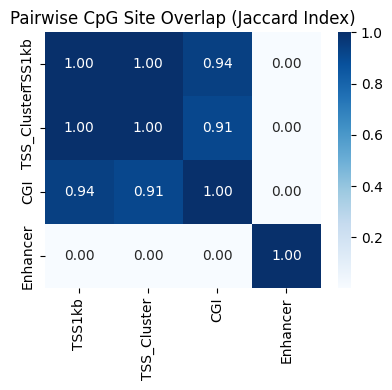

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# --- Load pre-cleaned, reduced-size files ---
file_paths = [
    "tss1kb_clean.csv",
    "tss_clusters_clean.csv",
    "cgi_clusters_clean.csv",
    "enh_clusters_clean.csv"
]

dataset_names = ["TSS1kb", "TSS_Cluster", "CGI", "Enhancer"]
dfs = [pd.read_csv(f, usecols=["CpG_sites_hg19"]) for f in file_paths]

# --- Extract CpG sets ---
def extract_cpg_set(df):
    all_sites = df['CpG_sites_hg19'].dropna().astype(str).str.split(';')
    flat_sites = set(site for sublist in all_sites for site in sublist)
    return flat_sites

cpg_sets = {name: extract_cpg_set(df) for name, df in zip(dataset_names, dfs)}

# --- Compute pairwise Jaccard overlaps ---
overlap_matrix = pd.DataFrame(index=dataset_names, columns=dataset_names)

for d1, d2 in combinations(dataset_names, 2):
    set1, set2 = cpg_sets[d1], cpg_sets[d2]
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    jaccard = intersection / len(set1)
    overlap_matrix.loc[d1, d2] = jaccard
    overlap_matrix.loc[d2, d1] = jaccard

# Diagonal = 1
for d in dataset_names:
    overlap_matrix.loc[d, d] = 1.0

# Convert to float
overlap_matrix = overlap_matrix.astype(float)

# --- Show numeric result ---
print("\nPairwise CpG Site Overlap (Jaccard Index):")
print(overlap_matrix.round(4))

# --- Plot heatmap ---
plt.figure(figsize=(4, 4))
sns.heatmap(overlap_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Pairwise CpG Site Overlap (Jaccard Index)")
plt.tight_layout()
plt.show()


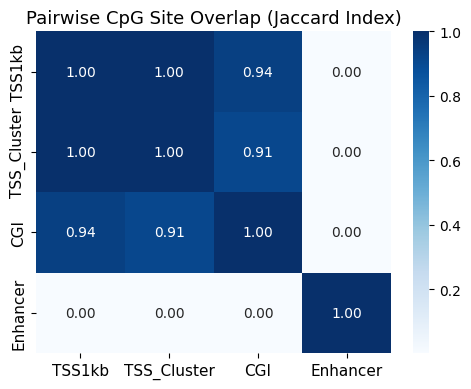

In [16]:
# --- Plot heatmap ---
plt.figure(figsize=(5, 4))
sns.heatmap(overlap_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Pairwise CpG Site Overlap (Jaccard Index)", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [ ]:
list(cpg_sets.keys())

In [ ]:
all_sites = set()
for dataset in list(cpg_sets.keys()):
    print(f"{dataset} has {len(cpg_sets[dataset])} cpg sites")
    all_sites = (all_sites | cpg_sets[dataset])



In [ ]:
len(all_sites)